# ML ASSIGNMENT - HR CHRUN PREDICTION

#### In this Machine Learning Model we are going to predict a binary outcome.We use the HR chrun employees dataset. We predict that the candidate will join the compnay or not from different independent variables.

# IMPORTING LIBRARIES

In [34]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set(style = 'darkgrid')
%matplotlib inline

In [3]:
hr = pd.read_csv('HR_Data.csv')

In [3]:
hr.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
hr.tail()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined
8995,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8996,11882,3664089,No,5,0,E2,20.00,10.00,-8.33,No,No,Male,Direct,8,ETS,Noida,34,Joined
8997,5080,2556130,Yes,4,30,E1,30.95,23.81,-5.45,No,No,Male,Direct,4,ETS,Bangalore,26,Joined


# Exloratory Data Analysis & Visualization

In [5]:
print(hr.shape)

(8998, 18)


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
SLNO                           8998 non-null int64
Candidate.Ref                  8998 non-null int64
DOJ.Extended                   8998 non-null object
Duration.to.accept.offer       8998 non-null int64
Notice.period                  8998 non-null int64
Offered.band                   8998 non-null object
Pecent.hike.expected.in.CTC    8998 non-null float64
Percent.hike.offered.in.CTC    8998 non-null float64
Percent.difference.CTC         8998 non-null float64
Joining.Bonus                  8998 non-null object
Candidate.relocate.actual      8998 non-null object
Gender                         8998 non-null object
Candidate.Source               8998 non-null object
Rex.in.Yrs                     8998 non-null int64
LOB                            8998 non-null object
Location                       8998 non-null object
Age                            8998 non-null int64
Status      

In [7]:
hr.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

### there are no null values in the given dataset

In [4]:
hr.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


In [9]:
hr['sex'] = hr.Gender.apply(lambda x:1 if x == 'Male' else 0)

In [10]:
hr.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status,sex
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,0
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,1
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,1
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,1
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,1


In [6]:
hr['status'] = hr.Status.apply(lambda x:1 if x == 'Joined' else 0)

In [12]:
hr.head(12)

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status,sex,status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,0,1
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,1,1
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,1,1
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,1,1
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,1,1
5,6,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined,1,1
6,7,2119124,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined,1,1
7,9,2127572,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,Noida,34,Joined,0,1
8,11,2138169,No,1,30,E1,-22.22,-22.22,0.00,No,No,Female,Employee Referral,3,BFSI,Gurgaon,26,Joined,0,1
9,12,2143362,No,6,30,E1,240.00,220.00,-5.88,No,No,Male,Employee Referral,3,CSMP,Chennai,34,Joined,1,1


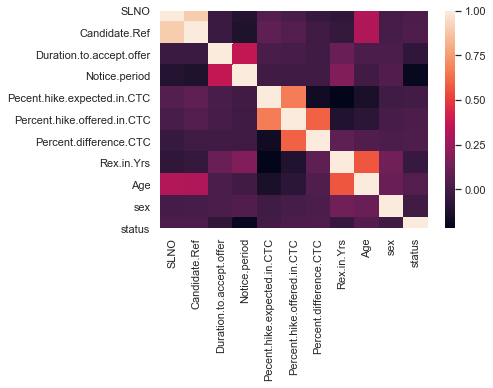

In [34]:
cr = hr.corr()
sb.heatmap(cr)

In [18]:
hr.rename(columns = {'Candidate.Source': 'candidate_source'}, inplace = True)

<Figure size 1440x1440 with 0 Axes>

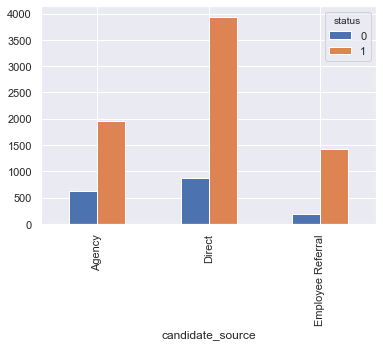

In [19]:
plt.figure(figsize = (20,20))
pd.crosstab(hr.candidate_source, hr.status).plot(kind = 'bar')
plt.show()

### mostly the candidate has joined through direct source.

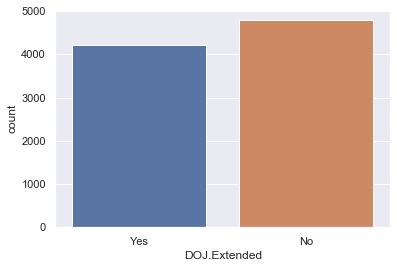

In [36]:
sb.countplot(x = 'DOJ.Extended', data = hr)

### Mostly Candidates had not Extendend the joining date

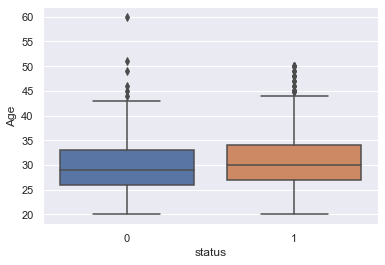

In [38]:
sb.boxplot(y = 'Age', x = 'status', data = hr)

### There is no significant difference between age and joining status.(age between 25-35 have joined the organizations)

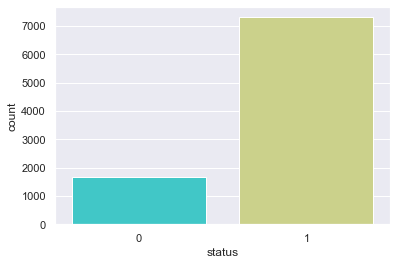

In [13]:
sb.countplot(x='status', data=hr, palette='rainbow')
plt.show()

<Figure size 1440x2880 with 0 Axes>

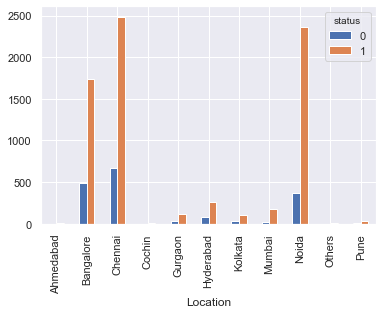

In [17]:
plt.figure(figsize= (20,40))
pd.crosstab( hr.Location,hr. status).plot(kind = 'bar')
plt.show()

### According to location, Mostly candidates have joined the Organizations from Chennai, Noida, Banglore

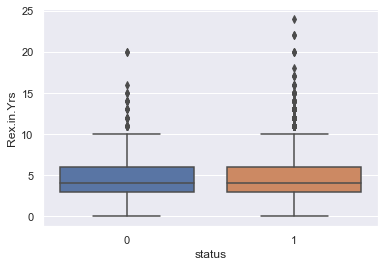

In [21]:
sb.boxplot(y = 'Rex.in.Yrs', x = 'status', data = hr )
plt.show()

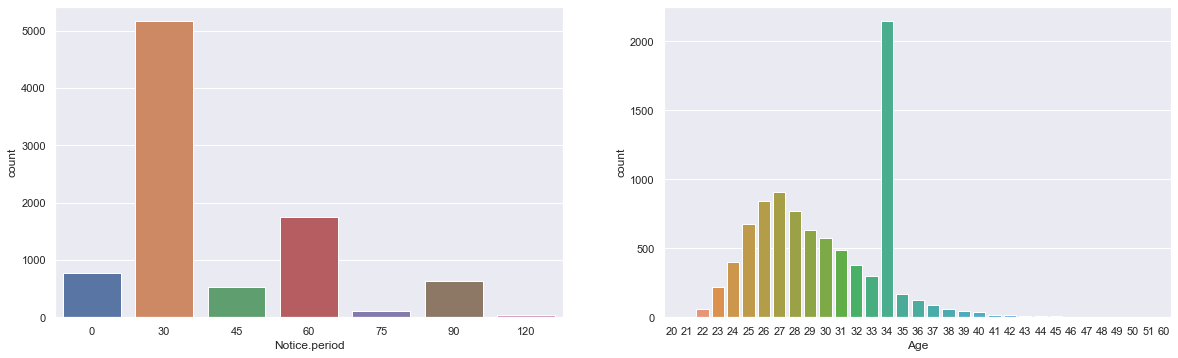

In [16]:
features =['Notice.period', 'Age']
fig = plt.subplots(figsize = (20, 40))
for i, j in enumerate(features):
           plt.subplot(4, 2, i+1)
           plt.subplots_adjust(hspace = 1.0)
           sb.countplot(x = j, data = hr)

# Training & Testing Split

In [25]:
y = hr.status
X = hr.loc[:,['Rex.in.Yrs', 'Age', 'Duration.to.accept.offer', 'Percent.hike.offered.in.CTC']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

# Building a Prediction Model

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gb = GradientBoostingClassifier()

In [30]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
y_pred = gb.predict(X_test)

# Evaluating Model Performance

In [32]:
from sklearn import metrics

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.802962962962963
Precision: 0.8061262607396339
Recall: 0.9940119760479041


# CONCLUSION

## 1. THE COMPNAY SHOULD RECRUITE THE CANDIDATE HAVING THE EXPERIENCE OF 3 TO 5 YEARS.

## 2. AROUND 80% OF CANDIDATE JOINING THE COMPNAY ARE HAVING AGE BETWEEN 31-34 YEARS.

## 3. THE DIFFERNCE BETWEEN THE OFFERED CTC AND EXPECTED CTC SHOULD BE MINIMUM AS POSSIBLE.

## 4. CANDIDATE FROM BANGLORE, CHENNAI, NOIDA HAS MAXMUM RECRUITMENT.

## 5. OVERALL CANDIDATE JOINING THE COMPNAY ARE OF MALE CATEGORY.